In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statistics
import pandas as pd
from scipy.stats import norm, kstest
from scipy.stats import describe
from scipy.stats import ks_2samp
import math
from statsmodels.tsa.stattools import acf
import scipy.stats as stats 

In [2]:
def r(ts):
    lag_corr = []
    for i in range(0,len(ts)):
        vals = acf(ts[i])
        print(vals)
        lag_corr.append(vals[1])
        
    return np.mean(lag_corr)
def rtemp(ts):
    return acf(ts)[1]
    
def my_ks_2samp(s1,s2,alpha,r1,r2):
    
    # Gets all observations
    s1 = np.sort(s1)
    s2 = np.sort(s2)
    observations = np.concatenate([s1, s2])

    #generate cdfs
    m,n = len(s1),len(s2) 
    cdf1 = np.searchsorted(s1, observations, side='right')/m
    cdf2 = np.searchsorted(s2, observations, side='right')/n

    #change smaple size to effective samaple size
    meff,neff= ((1-r1)/(1+r1))*m,((1-r2)/(1+r2))*n 
    en = meff * neff / (meff + neff)

    #compute statistic for given confidence interval
    C =np.sqrt(-np.log(alpha/2)*0.5)
    A = C*np.sqrt(1/en)

    #take difference between cdfs
    cddiffs = cdf1 - cdf2
    argminS = np.argmin(cddiffs)
    argmaxS = np.argmax(cddiffs)
    
    # Ensure sign of minS is not negative.
    minS = np.clip(-cddiffs[argminS], 0, 1)
    maxS = cddiffs[argmaxS]

    if  minS > maxS:
        d = minS
    else:
        d = maxS

    p_value = stats.kstwo.sf(d, np.round(en))
    return {"statistic": d, "pvalue" : p_value, "c_value": A}

In [13]:
variable = 'Umass'
modelname1 = 'IPSL-CM6A-LR'
modelname2 = 'CNRM-CM6-1'
modelname3 = 'UKESM1-0-LL'
modelname4 = 'CanESM5'
modelname6 = 'ACCESS-ESM1-5'


model1 = np.load(''+variable+'_'+modelname1+'_historical.npy')
model2 = np.load(''+variable+'_'+modelname2+'_historical.npy')
model3 = np.load(''+variable+'_'+modelname3+'_historical.npy')
model4 = np.load(''+variable+'_'+modelname4+'_historical.npy')
model6 = np.load(''+variable+'_'+modelname6+'_historical.npy')

ERA5 = np.load('ERA5_'+variable+'.npy')

if(variable=='phibar'):
    binvals=np.arange(25,75,1)
    units='[deg N]'
if(variable=='alpha'):
    binvals=np.arange(-60,60,2)
    units='[deg]'
if(variable=='Umean'):
    binvals=np.arange(7.5,22.5,0.6)
    units='[m/s]'
if(variable=='Umass'):
    binvals=np.arange(0,3,0.05)
    units='[1E14 km^2 m/s]'
    ERA5=ERA5/1E14
    

In [14]:
#CALCULATE K-S TEST
#model1
r1 = rtemp(model1)
r5 = rtemp(ERA5)

KS1 = my_ks_2samp(model1,ERA5,0.05,r1,r5)
print(KS1)

statistic = "{:.2e}".format(KS1["statistic"])
pvalue = "{:.2e}".format(KS1["pvalue"])

#model2
r2 = rtemp(model2)

KS2 = my_ks_2samp(model2,ERA5,0.05,r2,r5)
print(KS2)

statistic2 = "{:.2e}".format(KS2["statistic"])
pvalue2 = "{:.2e}".format(KS2["pvalue"])


#model3
r3 = rtemp(model3)

KS3 = my_ks_2samp(model3,ERA5,0.05,r3,r5)
print(KS3)
statistic3 = "{:.2e}".format(KS3["statistic"])
pvalue3 = "{:.2e}".format(KS3["pvalue"])

#model4
r4 = rtemp(model4)

KS4 = my_ks_2samp(model4,ERA5,0.05,r4,r5)
print(KS4)
statistic4 = "{:.2e}".format(KS4["statistic"])
pvalue4 = "{:.2e}".format(KS4["pvalue"])

#model6
r6 = rtemp(model6)

KS6 = my_ks_2samp(model6,ERA5,0.05,r6,r5)
print(KS6)
statistic6 = "{:.2e}".format(KS6["statistic"])
pvalue6 = "{:.2e}".format(KS6["pvalue"])





{'statistic': 0.48916394918007877, 'pvalue': 2.392457050026231e-09, 'c_value': 0.21435551241854833}
{'statistic': 0.46882001428596315, 'pvalue': 1.391440120522107e-08, 'c_value': 0.213501609348106}
{'statistic': 0.3331017980578289, 'pvalue': 0.00014765067032536513, 'c_value': 0.21220005378661516}
{'statistic': 0.6046293964576512, 'pvalue': 1.5390722536667574e-14, 'c_value': 0.21387215297820988}
{'statistic': 0.4078105328859203, 'pvalue': 1.1193884966589353e-06, 'c_value': 0.21338273432200663}


,IPSL-CM6A-LR,CNRM-CM6-1,UKESM1-0-LL,CanESM5,ACCESS-ESM1-5,ERA5
Median,1.22,1.17,1.01,1.32,1.09,0.67
Mean,1.18,1.15,0.99,1.30,1.06,0.67
Standard Deviation,0.47,0.45,0.42,0.41,0.41,0.33
Skweness,-0.14,-0.09,0.01,-0.22,-0.09,0.06


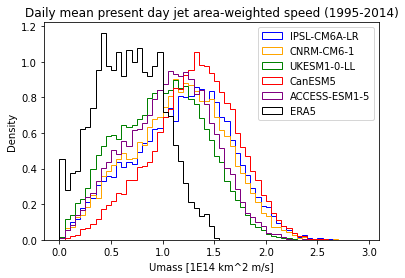

In [15]:


plt.hist(model1, density=True, bins = binvals, histtype='step', stacked=True, fill=False, color='blue', label= modelname1)
plt.hist(model2, density=True, bins = binvals, histtype='step', stacked=True, fill=False, color='orange', label= modelname2)  
plt.hist(model3, density=True, bins = binvals, histtype='step', stacked=True, fill=False, color='green', label= modelname3)
plt.hist(model4, density=True, bins = binvals, histtype='step', stacked=True, fill=False, color='red', label= modelname4)
plt.hist(model6, density=True, bins = binvals, histtype='step', stacked=True, fill=False, color='purple', label= modelname6)
plt.hist(ERA5, density=True, bins = binvals, histtype='step', stacked=True, fill=False, color='black', label= 'ERA5')
plt.ylabel('Density')
plt.xlabel(variable+' '+units)
plt.title('Daily mean present day jet area-weighted speed (1995-2014)')
plt.legend()
plt.savefig("test.png")



pd.DataFrame({modelname1: [(round(statistics.median(model1),2)), (round(statistics.mean(model1),2)), (round(statistics.stdev(model1), 2)), (round(scipy.stats.skew(model1),2))], 
              modelname2: [(round(statistics.median(model2),2)), (round(statistics.mean(model2),2)), (round(statistics.stdev(model2),2)), (round(scipy.stats.skew(model2),2))],
             modelname3: [(round(statistics.median(model3),2)), (round(statistics.mean(model3),2)), (round(statistics.stdev(model3),2)),(round(scipy.stats.skew(model3),2)),],
              modelname4: [(round(statistics.median(model4),2)), (round(statistics.mean(model4),2)), (round(statistics.stdev(model4),2)),(round(scipy.stats.skew(model4),2)),],
              modelname6: [(round(statistics.median(model6),2)), (round(statistics.mean(model6),2)), (round(statistics.stdev(model6),2)),(round(scipy.stats.skew(model6),2)),],
             'ERA5': [(round(statistics.median(ERA5),2)), (round(statistics.mean(ERA5),2)), (round(statistics.stdev(ERA5),2)),(round(scipy.stats.skew(ERA5),2)),]},
             index=['Median', 'Mean', 'Standard Deviation', 'Skweness'])




In [11]:
pd.DataFrame({modelname1+' and ERA5': [statistic+', '+pvalue],
              modelname2+' and ERA5': [statistic2+', '+pvalue2],
              modelname3+' and ERA5': [statistic3+', '+pvalue3],
              modelname4+' and ERA5': [statistic4+', '+pvalue4],
             modelname6+' and ERA5': [statistic6+', '+pvalue6],},
             index=['K-S test (statistic, p-value)'])

,IPSL-CM6A-LR and ERA5,CNRM-CM6-1 and ERA5,UKESM1-0-LL and ERA5,CanESM5 and ERA5,ACCESS-ESM1-5 and ERA5
"K-S test (statistic, p-value)","4.89e-01, 2.39e-09","4.69e-01, 1.39e-08","3.33e-01, 1.48e-04","6.05e-01, 1.54e-14","4.08e-01, 1.12e-06"
